# Data Perparation

In [ ]:
!wget "https://drive.google.com/u/0/uc?id=1rHb0FQ5z5ZpaY2HpyFGY6CeyDG0kTLoO&export=download" -O english_python_data.txt 
from google.colab import drive
drive.mount('/content/drive')
#/content/drive/MyDrive/FYP/Model/model.pt


--2022-04-17 15:05:56--  https://drive.google.com/u/0/uc?id=1rHb0FQ5z5ZpaY2HpyFGY6CeyDG0kTLoO&export=download
Resolving drive.google.com (drive.google.com)... 142.251.8.138, 142.251.8.113, 142.251.8.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.138|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1rHb0FQ5z5ZpaY2HpyFGY6CeyDG0kTLoO&export=download [following]
--2022-04-17 15:05:56--  https://drive.google.com/uc?id=1rHb0FQ5z5ZpaY2HpyFGY6CeyDG0kTLoO&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4au0354gnmse0569leugvnf4p7af31au/1650207900000/02008525212197398114/*/1rHb0FQ5z5ZpaY2HpyFGY6CeyDG0kTLoO?e=download [following]
--2022-04-17 15:05:58--  https://doc-14-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mb

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchtext
from torchtext.legacy.data import Field, BucketIterator, Iterator
from torchtext.legacy import data

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import spacy
import numpy as np
import pandas as pd

import random
import math
import time

In [ ]:
torchtext.__version__

'0.11.0'

In [ ]:
%set_env CUDA_LAUNCH_BLOCKING = 1

env: CUDA_LAUNCH_BLOCKING=1


## Reading the text file

In [ ]:
f = open("english_python_data.txt", "r")
file_lines = f.readlines()

In [ ]:
file_lines[:20]

['# write a python program to add two numbers \n',
 'num1 = 1.5\n',
 'num2 = 6.3\n',
 'sum = num1 + num2\n',
 "print(f'Sum: {sum}')\n",
 '\n',
 '\n',
 '# write a python function to add two user provided numbers and return the sum\n',
 'def add_two_numbers(num1, num2):\n',
 '    sum = num1 + num2\n',
 '    return sum\n',
 '\n',
 '\n',
 '# write a program to find and print the largest among three numbers\n',
 '\n',
 'num1 = 10\n',
 'num2 = 12\n',
 'num3 = 14\n',
 'if (num1 >= num2) and (num1 >= num3):\n',
 '   largest = num1\n']

In [ ]:
dps = []
dp = None
for line in file_lines:
  if line[0] == "#":
    if dp:
      dp['solution'] = ''.join(dp['solution'])
      dps.append(dp)
    dp = {"question": None, "solution": []}
    dp['question'] = line[1:]
  else:
    dp["solution"].append(line)

NameError: ignored

In [ ]:
i=0
for dp in dps:
  print("\n Question no: ", i+1)
  i+=1
  print(dp['question'][1:])
  print(dp['solution'])
  if i>10:
    break


 Question no:  1
write a python program to add two numbers 

num1 = 1.5
num2 = 6.3
sum = num1 + num2
print(f'Sum: {sum}')




 Question no:  2
write a python function to add two user provided numbers and return the sum

def add_two_numbers(num1, num2):
    sum = num1 + num2
    return sum




 Question no:  3
write a program to find and print the largest among three numbers


num1 = 10
num2 = 12
num3 = 14
if (num1 >= num2) and (num1 >= num3):
   largest = num1
elif (num2 >= num1) and (num2 >= num3):
   largest = num2
else:
   largest = num3
print(f'largest:{largest}')




 Question no:  4
write a program to find and print the smallest among three numbers

num1 = 10
num2 = 12
num3 = 14
if (num1 <= num2) and (num1 <= num3):
   smallest = num1
elif (num2 <= num1) and (num2 <= num3):
   smallest = num2
else:
   smallest = num3
print(f'smallest:{smallest}')




 Question no:  5
Write a python function to merge two given lists into one

def merge_lists(l1, l2):
    return l1 + l2




 Quest

In [ ]:
dataSet = pd.read_csv('/content/drive/MyDrive/FYP/Datasets/conala-test.csv')
dps =[]
ques = dataSet['rewritten_intent']
sol = dataSet['snippet']
backup = dataSet['intent']
print(ques[4])

print(len(ques), len(sol))

for i in range(len(ques)):
  if pd.isnull(ques[i]):
      dp = {"question": backup[i], "solution": sol[i]}
      print("found")
      dps.append(dp)
      dp = {"question": sol[i], "solution": backup[i]}
      dps.append(dp)
  else:  
    dp = {"question": ques[i], "solution": sol[i]}
    dps.append(dp)
    dp = {"question": sol[i], "solution": ques[i]}
    dps.append(dp)

dataSet = pd.read_csv('/content/drive/MyDrive/FYP/Datasets/conala-train.csv')

ques = dataSet['rewritten_intent']
sol = dataSet['snippet']
backup = dataSet['intent']
print(ques[4])

print(len(ques), len(sol))

for i in range(len(ques)):
  if pd.isnull(ques[i]):
      dp = {"question": backup[i], "solution": sol[i]}
      print("found")
      dps.append(dp)
      dp = {"question": sol[i], "solution": backup[i]}
      dps.append(dp)
  else:  
    dp = {"question": ques[i], "solution": sol[i]}
    dps.append(dp)
    dp = {"question": sol[i], "solution": ques[i]}
    dps.append(dp)

print(dps[100])
print(len(dps))


nan
500 500
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
zip two lists `[1, 2]` and `[3, 4]` into a list of two tuples containing elements at the same index in each list
2379 2379
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
{'question': 'Reverse the order of words, delimited by `.`, in string `s`', 'solution': '""".""".join(s.split(\'.\')[::-1])'}
5758


In [ ]:
print("Dataset size:", len(dps))

Dataset size: 5758


In [ ]:
from tokenize import tokenize, untokenize
import io


def tokenize_python_code(python_code_str):
    python_tokens = list(tokenize(io.BytesIO(python_code_str.encode('utf-8')).readline))
    tokenized_output = []
    for i in range(0, len(python_tokens)):
        tokenized_output.append((python_tokens[i].type, python_tokens[i].string))
    return tokenized_output


In [ ]:
tokenized_sample = tokenize_python_code(dps[1]['solution'])
print(tokenized_sample)

[(57, 'utf-8'), (1, 'send'), (1, 'a'), (1, 'signal'), (54, ' '), (54, '`'), (1, 'signal'), (53, '.'), (1, 'SIGUSR1'), (54, '`'), (1, 'to'), (1, 'the'), (1, 'current'), (1, 'process'), (4, ''), (0, '')]


In [ ]:
print(untokenize(tokenized_sample).decode('utf-8'))

send a signal  `signal .SIGUSR1 `to the current process 


In [ ]:
import keyword

print(keyword.kwlist)

['False', 'None', 'True', 'and', 'as', 'assert', 'async', 'await', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']


In [ ]:
def augment_tokenize_python_code(python_code_str, mask_factor=0.3):


    var_dict = {} # Dictionary that stores masked variables

    # certain reserved words that should not be treated as normal variables and
    # hence need to be skipped from our variable mask augmentations
    skip_list = ['range', 'enumerate', 'print', 'ord', 'int', 'float', 'zip'
                 'char', 'list', 'dict', 'tuple', 'set', 'len', 'sum', 'min', 'max']
    skip_list.extend(keyword.kwlist)

    var_counter = 1
    python_tokens = list(tokenize(io.BytesIO(python_code_str.encode('utf-8')).readline))
    tokenized_output = []

    for i in range(0, len(python_tokens)):
      if python_tokens[i].type == 1 and python_tokens[i].string not in skip_list:
        
        if i>0 and python_tokens[i-1].string in ['def', '.', 'import', 'raise', 'except', 'class']: # avoid masking modules, functions and error literals
          skip_list.append(python_tokens[i].string)
          tokenized_output.append((python_tokens[i].type, python_tokens[i].string))
        elif python_tokens[i].string in var_dict:  # if variable is already masked
          tokenized_output.append((python_tokens[i].type, var_dict[python_tokens[i].string]))
        elif random.uniform(0, 1) > 1-mask_factor: # randomly mask variables
          var_dict[python_tokens[i].string] = 'var_' + str(var_counter)
          var_counter+=1
          tokenized_output.append((python_tokens[i].type, var_dict[python_tokens[i].string]))
        else:
          skip_list.append(python_tokens[i].string)
          tokenized_output.append((python_tokens[i].type, python_tokens[i].string))
      
      else:
        tokenized_output.append((python_tokens[i].type, python_tokens[i].string))
    
    return tokenized_output

In [ ]:
tokenized_sample = augment_tokenize_python_code(dps[0]['solution'])
print(tokenized_sample)

[(57, 'utf-8'), (1, 'var_1'), (53, '.'), (1, 'kill'), (53, '('), (1, 'var_1'), (53, '.'), (1, 'getpid'), (53, '('), (53, ')'), (53, ','), (1, 'signal'), (53, '.'), (1, 'SIGUSR1'), (53, ')'), (4, ''), (0, '')]


In [ ]:
print(untokenize(tokenized_sample).decode('utf-8'))

var_1 .kill (var_1 .getpid (),signal .SIGUSR1 )


## Building Train and Validation Dataset

In [ ]:
python_problems_df = pd.DataFrame(dps)

In [ ]:
python_problems_df.head()

,question,solution
0,send a signal `signal.SIGUSR1` to the current ...,"os.kill(os.getpid(), signal.SIGUSR1)"
1,"os.kill(os.getpid(), signal.SIGUSR1)",send a signal `signal.SIGUSR1` to the current ...
2,decode a hex string '4a4b4c' to UTF-8.,bytes.fromhex('4a4b4c').decode('utf-8')
3,bytes.fromhex('4a4b4c').decode('utf-8'),decode a hex string '4a4b4c' to UTF-8.
4,check if all elements in list `myList` are ide...,all(x == myList[0] for x in myList)


In [ ]:
python_problems_df.shape

(5758, 2)

In [ ]:
import numpy as np

np.random.seed(0)
msk = np.random.rand(len(python_problems_df)) < 0.85 # Splitting data into 85% train and 15% validation

train_df = python_problems_df[msk]
val_df = python_problems_df[~msk]

In [ ]:
train_df.shape

(4890, 2)

In [ ]:
val_df.shape

(868, 2)

## Creating vocabulary using torchtext

In [ ]:
SEED = 1234

random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [ ]:
Input = data.Field(tokenize = 'spacy',
            init_token='<sos>', 
            eos_token='<eos>', 
            lower=True)

Output = data.Field(tokenize = augment_tokenize_python_code,
                    init_token='<sos>', 
                    eos_token='<eos>', 
                    lower=False)

In [ ]:
fields = [('Input', Input),('Output', Output)]

In [ ]:
train_example = []
val_example = []

train_expansion_factor = 100
for j in range(train_expansion_factor):
  for i in range(train_df.shape[0]):
      try:
          ex = data.Example.fromlist([train_df.question[i], train_df.solution[i]], fields)
          train_example.append(ex)
      except:
          pass

for i in range(val_df.shape[0]):
    try:
        ex = data.Example.fromlist([val_df.question[i], val_df.solution[i]], fields)
        val_example.append(ex)
    except:
        pass       

In [ ]:
train_data = data.Dataset(train_example, fields)
valid_data =  data.Dataset(val_example, fields)

In [ ]:
Input.build_vocab(train_data, min_freq = 0)
Output.build_vocab(train_data, min_freq = 0)

In [ ]:
Output.vocab

In [ ]:
def save_vocab(vocab, path):
    import pickle
    output = open(path, 'wb')
    pickle.dump(vocab, output)
    output.close()

In [ ]:
save_vocab(Input.vocab, "/content/drive/MyDrive/FYP/Model/src_vocab.pkl")
save_vocab(Output.vocab, "/content/drive/MyDrive/FYP/Model/trg_vocab.pkl")

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
train_data[500].Output

[(57, 'utf-8'),
 (1, 'var_1'),
 (53, '.'),
 (1, 'update'),
 (53, '('),
 (1, 'dict'),
 (53, '('),
 (1, 'a'),
 (53, '='),
 (2, '1'),
 (53, ')'),
 (53, ')'),
 (4, ''),
 (0, '')]

In [ ]:
print(vars(train_data.examples[500]))

{'Input': ['add', 'key', "'", 'a', "'", 'to', 'dictionary', '`', 'data', '`', 'with', 'value', '1'], 'Output': [(57, 'utf-8'), (1, 'var_1'), (53, '.'), (1, 'update'), (53, '('), (1, 'dict'), (53, '('), (1, 'a'), (53, '='), (2, '1'), (53, ')'), (53, ')'), (4, ''), (0, '')]}


# Transformer Architecture

## Encoder

In [ ]:
class Encoder(nn.Module):
    def __init__(self, 
                 input_dim, 
                 hid_dim, 
                 n_layers, 
                 n_heads, 
                 pf_dim,
                 dropout, 
                 device,
                 max_length = 1000):
        super().__init__()

        self.device = device
        
        self.tok_embedding = nn.Embedding(input_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        
        self.layers = nn.ModuleList([EncoderLayer(hid_dim, 
                                                  n_heads, 
                                                  pf_dim,
                                                  dropout, 
                                                  device) 
                                     for _ in range(n_layers)])
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)
        
    def forward(self, src, src_mask):
        
        #src = [batch size, src len]
        #src_mask = [batch size, 1, 1, src len]
        
        batch_size = src.shape[0]
        src_len = src.shape[1]

        pos = torch.arange(0, src_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        
        #pos = [batch size, src len]
        src = self.dropout((self.tok_embedding(src) * self.scale) + self.pos_embedding(pos))
        
        #src = [batch size, src len, hid dim]
        
        for layer in self.layers:
            src = layer(src, src_mask)
            
        #src = [batch size, src len, hid dim]
            
        return src

In [ ]:
class EncoderLayer(nn.Module):
    def __init__(self, 
                 hid_dim, 
                 n_heads, 
                 pf_dim,  
                 dropout, 
                 device):
        super().__init__()
        
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.ff_layer_norm = nn.LayerNorm(hid_dim)
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim, 
                                                                     pf_dim, 
                                                                     dropout)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, src, src_mask):
        
        #src = [batch size, src len, hid dim]
        #src_mask = [batch size, 1, 1, src len] 
                
        #self attention
        _src, _ = self.self_attention(src, src, src, src_mask)
        
        #dropout, residual connection and layer norm
        src = self.self_attn_layer_norm(src + self.dropout(_src))
        
        #src = [batch size, src len, hid dim]
        
        #positionwise feedforward
        _src = self.positionwise_feedforward(src)
        
        #dropout, residual and layer norm
        src = self.ff_layer_norm(src + self.dropout(_src))
        
        #src = [batch size, src len, hid dim]
        
        return src

In [ ]:
class PositionwiseFeedforwardLayer(nn.Module):
    def __init__(self, hid_dim, pf_dim, dropout):
        super().__init__()
        
        self.fc_1 = nn.Linear(hid_dim, pf_dim)
        self.fc_2 = nn.Linear(pf_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        
        #x = [batch size, seq len, hid dim]
        
        x = self.dropout(torch.relu(self.fc_1(x)))
        
        #x = [batch size, seq len, pf dim]
        
        x = self.fc_2(x)
        
        #x = [batch size, seq len, hid dim]
        
        return x

## Attention

In [ ]:
class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, dropout, device):
        super().__init__()
        
        assert hid_dim % n_heads == 0
        
        self.hid_dim = hid_dim
        self.n_heads = n_heads
        self.head_dim = hid_dim // n_heads
        
        self.fc_q = nn.Linear(hid_dim, hid_dim)
        self.fc_k = nn.Linear(hid_dim, hid_dim)
        self.fc_v = nn.Linear(hid_dim, hid_dim)
        
        self.fc_o = nn.Linear(hid_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)
        
    def forward(self, query, key, value, mask = None):
        
        batch_size = query.shape[0]
        
        #query = [batch size, query len, hid dim]
        #key = [batch size, key len, hid dim]
        #value = [batch size, value len, hid dim]
                
        Q = self.fc_q(query)
        K = self.fc_k(key)
        V = self.fc_v(value)
        
        #Q = [batch size, query len, hid dim]
        #K = [batch size, key len, hid dim]
        #V = [batch size, value len, hid dim]
                
        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        
        #Q = [batch size, n heads, query len, head dim]
        #K = [batch size, n heads, key len, head dim]
        #V = [batch size, n heads, value len, head dim]
                
        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale
        
        #energy = [batch size, n heads, query len, key len]
        
        if mask is not None:
            energy = energy.masked_fill(mask == 0, -1e10)
        
        attention = torch.softmax(energy, dim = -1)
                
        #attention = [batch size, n heads, query len, key len]
                
        x = torch.matmul(self.dropout(attention), V)
        
        #x = [batch size, n heads, query len, head dim]
        
        x = x.permute(0, 2, 1, 3).contiguous()
        
        #x = [batch size, query len, n heads, head dim]
        
        x = x.view(batch_size, -1, self.hid_dim)
        
        #x = [batch size, query len, hid dim]
        
        x = self.fc_o(x)
        
        #x = [batch size, query len, hid dim]
        
        return x, attention

## Decoder

In [ ]:
class Decoder(nn.Module):
    def __init__(self, 
                 output_dim, 
                 hid_dim, 
                 n_layers, 
                 n_heads, 
                 pf_dim, 
                 dropout, 
                 device,
                 max_length = 10000):
        super().__init__()
        
        self.device = device
        
        self.tok_embedding = nn.Embedding(output_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        
        self.layers = nn.ModuleList([DecoderLayer(hid_dim, 
                                                  n_heads, 
                                                  pf_dim, 
                                                  dropout, 
                                                  device)
                                     for _ in range(n_layers)])
        
        self.fc_out = nn.Linear(hid_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)
        
    def forward(self, trg, enc_src, trg_mask, src_mask):
        
        #trg = [batch size, trg len]
        #enc_src = [batch size, src len, hid dim]
        #trg_mask = [batch size, 1, trg len, trg len]
        #src_mask = [batch size, 1, 1, src len]
                
        batch_size = trg.shape[0]
        trg_len = trg.shape[1]
        
        pos = torch.arange(0, trg_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
                            
        #pos = [batch size, trg len]

        trg = self.dropout((self.tok_embedding(trg) * self.scale) + self.pos_embedding(pos))
                
        #trg = [batch size, trg len, hid dim]
        
        for layer in self.layers:
            trg, attention = layer(trg, enc_src, trg_mask, src_mask)
        
        #trg = [batch size, trg len, hid dim]
        #attention = [batch size, n heads, trg len, src len]
        
        output = self.fc_out(trg)
        
        #output = [batch size, trg len, output dim]
            
        return output, attention

In [ ]:
class DecoderLayer(nn.Module):
    def __init__(self, 
                 hid_dim, 
                 n_heads, 
                 pf_dim, 
                 dropout, 
                 device):
        super().__init__()
        
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.enc_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.ff_layer_norm = nn.LayerNorm(hid_dim)
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.encoder_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim, 
                                                                     pf_dim, 
                                                                     dropout)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, trg, enc_src, trg_mask, src_mask):
        
        #trg = [batch size, trg len, hid dim]
        #enc_src = [batch size, src len, hid dim]
        #trg_mask = [batch size, 1, trg len, trg len]
        #src_mask = [batch size, 1, 1, src len]
        
        #self attention
        _trg, _ = self.self_attention(trg, trg, trg, trg_mask)
        
        #dropout, residual connection and layer norm
        trg = self.self_attn_layer_norm(trg + self.dropout(_trg))
            
        #trg = [batch size, trg len, hid dim]
            
        #encoder attention
        _trg, attention = self.encoder_attention(trg, enc_src, enc_src, src_mask)
        # query, key, value
        
        #dropout, residual connection and layer norm
        trg = self.enc_attn_layer_norm(trg + self.dropout(_trg))
                    
        #trg = [batch size, trg len, hid dim]
        
        #positionwise feedforward
        _trg = self.positionwise_feedforward(trg)
        
        #dropout, residual and layer norm
        trg = self.ff_layer_norm(trg + self.dropout(_trg))
        
        #trg = [batch size, trg len, hid dim]
        #attention = [batch size, n heads, trg len, src len]
        
        return trg, attention

In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, 
                 encoder, 
                 decoder, 
                 src_pad_idx, 
                 trg_pad_idx, 
                 device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.src_pad_idx = src_pad_idx
        self.trg_pad_idx = trg_pad_idx
        self.device = device
        
    def make_src_mask(self, src):
        
        #src = [batch size, src len]
        
        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)

        #src_mask = [batch size, 1, 1, src len]

        return src_mask
    
    def make_trg_mask(self, trg):
        
        #trg = [batch size, trg len]
        
        trg_pad_mask = (trg != self.trg_pad_idx).unsqueeze(1).unsqueeze(2)
        
        #trg_pad_mask = [batch size, 1, 1, trg len]
        
        trg_len = trg.shape[1]
        
        trg_sub_mask = torch.tril(torch.ones((trg_len, trg_len), device = self.device)).bool()
        
        #trg_sub_mask = [trg len, trg len]
            
        trg_mask = trg_pad_mask & trg_sub_mask
        
        #trg_mask = [batch size, 1, trg len, trg len]
        
        return trg_mask

    def forward(self, src, trg):
        
        #src = [batch size, src len]
        #trg = [batch size, trg len]
                
        src_mask = self.make_src_mask(src)
        trg_mask = self.make_trg_mask(trg)
        
        #src_mask = [batch size, 1, 1, src len]
        #trg_mask = [batch size, 1, trg len, trg len]
        
        enc_src = self.encoder(src, src_mask)
        
        #enc_src = [batch size, src len, hid dim]
                
        output, attention = self.decoder(trg, enc_src, trg_mask, src_mask)
        
        #output = [batch size, trg len, output dim]
        #attention = [batch size, n heads, trg len, src len]
        
        return output, attention

# Training

In [ ]:
INPUT_DIM = len(Input.vocab)
OUTPUT_DIM = len(Output.vocab)
HID_DIM = 256
ENC_LAYERS = 3
DEC_LAYERS = 3
ENC_HEADS = 16
DEC_HEADS = 16
ENC_PF_DIM = 512
DEC_PF_DIM = 512
ENC_DROPOUT = 0.1
DEC_DROPOUT = 0.1

enc = Encoder(INPUT_DIM, 
              HID_DIM, 
              ENC_LAYERS, 
              ENC_HEADS, 
              ENC_PF_DIM, 
              ENC_DROPOUT, 
              device)

dec = Decoder(OUTPUT_DIM, 
              HID_DIM, 
              DEC_LAYERS, 
              DEC_HEADS, 
              DEC_PF_DIM, 
              DEC_DROPOUT, 
              device)

In [ ]:
len(Output.vocab.__dict__['freqs'])

4292

In [ ]:
SRC_PAD_IDX = Input.vocab.stoi[Input.pad_token]
TRG_PAD_IDX = Output.vocab.stoi[Output.pad_token]

model = Seq2Seq(enc, dec, SRC_PAD_IDX, TRG_PAD_IDX, device).to(device)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 10,320,840 trainable parameters


In [ ]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

In [ ]:
model.apply(initialize_weights);

In [ ]:
LEARNING_RATE = 0.0005

optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)

## Loss function

In [ ]:
import torch
import math
import torch.nn as nn
import torch.nn.functional as F

class CrossEntropyLoss(nn.CrossEntropyLoss):
    """CrossEntropyLoss - with ability to recieve distrbution as targets, and optional label smoothing"""

    def __init__(self, weight=None, ignore_index=-100, reduction='mean', smooth_eps=None, smooth_dist=None, from_logits=True):
        super(CrossEntropyLoss, self).__init__(weight=weight,
                                               ignore_index=ignore_index, reduction=reduction)
        self.smooth_eps = smooth_eps
        self.smooth_dist = smooth_dist
        self.from_logits = from_logits

    def forward(self, input, target, smooth_dist=None):
        if smooth_dist is None:
            smooth_dist = self.smooth_dist
        return cross_entropy(input, target, weight=self.weight, ignore_index=self.ignore_index,
                             reduction=self.reduction, smooth_eps=self.smooth_eps,
                             smooth_dist=smooth_dist, from_logits=self.from_logits)


def cross_entropy(inputs, target, weight=None, ignore_index=-100, reduction='mean',
                  smooth_eps=None, smooth_dist=None, from_logits=True):
    """cross entropy loss, with support for target distributions and label smoothing https://arxiv.org/abs/1512.00567"""
    smooth_eps = smooth_eps or 0

    # ordinary log-liklihood - use cross_entropy from nn
    if _is_long(target) and smooth_eps == 0:
        if from_logits:
            return F.cross_entropy(inputs, target, weight, ignore_index=ignore_index, reduction=reduction)
        else:
            return F.nll_loss(inputs, target, weight, ignore_index=ignore_index, reduction=reduction)

    if from_logits:
        # log-softmax of inputs
        lsm = F.log_softmax(inputs, dim=-1)
    else:
        lsm = inputs

    masked_indices = None
    num_classes = inputs.size(-1)

    if _is_long(target) and ignore_index >= 0:
        masked_indices = target.eq(ignore_index)

    if smooth_eps > 0 and smooth_dist is not None:
        if _is_long(target):
            target = onehot(target, num_classes).type_as(inputs)
        if smooth_dist.dim() < target.dim():
            smooth_dist = smooth_dist.unsqueeze(0)
        target.lerp_(smooth_dist, smooth_eps)

    if weight is not None:
        lsm = lsm * weight.unsqueeze(0)

    if _is_long(target):
        eps_sum = smooth_eps / num_classes
        eps_nll = 1. - eps_sum - smooth_eps
        likelihood = lsm.gather(dim=-1, index=target.unsqueeze(-1)).squeeze(-1)
        loss = -(eps_nll * likelihood + eps_sum * lsm.sum(-1))
    else:
        loss = -(target * lsm).sum(-1)

    if masked_indices is not None:
        loss.masked_fill_(masked_indices, 0)

    if reduction == 'sum':
        loss = loss.sum()
    elif reduction == 'mean':
        if masked_indices is None:
            loss = loss.mean()
        else:
            loss = loss.sum() / float(loss.size(0) - masked_indices.sum())

    return loss


def onehot(indexes, N=None, ignore_index=None):
    """
    Creates a one-representation of indexes with N possible entries
    if N is not specified, it will suit the maximum index appearing.
    indexes is a long-tensor of indexes
    ignore_index will be zero in onehot representation
    """
    if N is None:
        N = indexes.max() + 1
    sz = list(indexes.size())
    output = indexes.new().byte().resize_(*sz, N).zero_()
    output.scatter_(-1, indexes.unsqueeze(-1), 1)
    if ignore_index is not None and ignore_index >= 0:
        output.masked_fill_(indexes.eq(ignore_index).unsqueeze(-1), 0)
    return output

def _is_long(x):
    if hasattr(x, 'data'):
        x = x.data
    return isinstance(x, torch.LongTensor) or isinstance(x, torch.cuda.LongTensor)


In [ ]:
def maskNLLLoss(inp, target, mask):
    # print(inp.shape, target.shape, mask.sum())
    nTotal = mask.sum()
    crossEntropy = CrossEntropyLoss(ignore_index = TRG_PAD_IDX, smooth_eps=0.20)
    loss = crossEntropy(inp, target)
    loss = loss.to(device)
    return loss, nTotal.item()

In [ ]:
criterion = maskNLLLoss

## Training

In [ ]:
from tqdm import tqdm

def make_trg_mask(trg):
        
        #trg = [batch size, trg len]
        
        trg_pad_mask = (trg != TRG_PAD_IDX).unsqueeze(1).unsqueeze(2)
        
        #trg_pad_mask = [batch size, 1, 1, trg len]
        
        trg_len = trg.shape[1]
        
        trg_sub_mask = torch.tril(torch.ones((trg_len, trg_len), device = device)).bool()
        
        #trg_sub_mask = [trg len, trg len]
            
        trg_mask = trg_pad_mask & trg_sub_mask
        
        #trg_mask = [batch size, 1, trg len, trg len]
        
        return trg_mask

def train(model, iterator, optimizer, criterion, clip):
    
    model.train()
    
    n_totals = 0
    print_losses = []
    for i, batch in tqdm(enumerate(iterator), total=len(iterator)):
        # print(batch)
        loss = 0
        src = batch.Input.permute(1, 0)
        trg = batch.Output.permute(1, 0)
        trg_mask = make_trg_mask(trg)
        optimizer.zero_grad()
        
        output, _ = model(src, trg[:,:-1])
                
        #output = [batch size, trg len - 1, output dim]
        #trg = [batch size, trg len]
            
        output_dim = output.shape[-1]
            
        output = output.contiguous().view(-1, output_dim)
        trg = trg[:,1:].contiguous().view(-1)
                
        #output = [batch size * trg len - 1, output dim]
        #trg = [batch size * trg len - 1]
            
        mask_loss, nTotal = criterion(output, trg, trg_mask)
        
        mask_loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        print_losses.append(mask_loss.item() * nTotal)
        n_totals += nTotal


        
    return sum(print_losses) / n_totals

In [ ]:
def evaluate(model, iterator, criterion):
    
    model.eval()
    
    n_totals = 0
    print_losses = []
    
    with torch.no_grad():
    
        for i, batch in tqdm(enumerate(iterator), total=len(iterator)):

            src = batch.Input.permute(1, 0)
            trg = batch.Output.permute(1, 0)
            trg_mask = make_trg_mask(trg)

            output, _ = model(src, trg[:,:-1])
            
            #output = [batch size, trg len - 1, output dim]
            #trg = [batch size, trg len]
            
            output_dim = output.shape[-1]
            
            output = output.contiguous().view(-1, output_dim)
            trg = trg[:,1:].contiguous().view(-1)
            
            #output = [batch size * trg len - 1, output dim]
            #trg = [batch size * trg len - 1]
            
            mask_loss, nTotal = criterion(output, trg, trg_mask)

            print_losses.append(mask_loss.item() * nTotal)
            n_totals += nTotal

        
    return sum(print_losses) / n_totals

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:

N_EPOCHS = 30
CLIP = 1
train_rec = []
valid_rec = []

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_example = []
    val_example = []

    for i in range(train_df.shape[0]):
        try:
            ex = data.Example.fromlist([train_df.question[i], train_df.solution[i]], fields)
            train_example.append(ex)
        except:
            pass

    for i in range(val_df.shape[0]):
        try:
            ex = data.Example.fromlist([val_df.question[i], val_df.solution[i]], fields)
            val_example.append(ex)
        except:
            pass       

    train_data = data.Dataset(train_example, fields)
    valid_data =  data.Dataset(val_example, fields)

    print(len(train_data))

    BATCH_SIZE = 16
    train_iterator, valid_iterator = BucketIterator.splits((train_data, valid_data), batch_size = BATCH_SIZE, 
                                                                sort_key = lambda x: len(x.Input),
                                                                sort_within_batch=True, device = device)

    train_loss = train(model, train_iterator, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, valid_iterator, criterion)

    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), '/content/drive/MyDrive/FYP/Model/conala.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')
    train_rec.append(train_loss)
    valid_rec.append(valid_loss)

4151


100%|██████████| 9/9 [00:00<00:00, 94.68it/s]


Epoch: 01 | Time: 0m 17s
	Train Loss: 4.992 | Train PPL: 147.239
	 Val. Loss: 4.453 |  Val. PPL:  85.886
4151


100%|██████████| 9/9 [00:00<00:00, 94.30it/s]


Epoch: 02 | Time: 0m 16s
	Train Loss: 4.306 | Train PPL:  74.169
	 Val. Loss: 4.289 |  Val. PPL:  72.881
4151


100%|██████████| 9/9 [00:00<00:00, 90.56it/s]


Epoch: 03 | Time: 0m 16s
	Train Loss: 4.137 | Train PPL:  62.609
	 Val. Loss: 4.214 |  Val. PPL:  67.602
4151


100%|██████████| 9/9 [00:00<00:00, 90.17it/s]


Epoch: 04 | Time: 0m 16s
	Train Loss: 4.017 | Train PPL:  55.536
	 Val. Loss: 4.156 |  Val. PPL:  63.829
4151


100%|██████████| 9/9 [00:00<00:00, 95.17it/s]


Epoch: 05 | Time: 0m 16s
	Train Loss: 3.918 | Train PPL:  50.319
	 Val. Loss: 4.158 |  Val. PPL:  63.930
4151


100%|██████████| 9/9 [00:00<00:00, 95.74it/s]


Epoch: 06 | Time: 0m 16s
	Train Loss: 3.842 | Train PPL:  46.624
	 Val. Loss: 4.066 |  Val. PPL:  58.329
4151


100%|██████████| 9/9 [00:00<00:00, 94.14it/s]


Epoch: 07 | Time: 0m 16s
	Train Loss: 3.758 | Train PPL:  42.842
	 Val. Loss: 4.086 |  Val. PPL:  59.497
4151


100%|██████████| 9/9 [00:00<00:00, 90.76it/s]


Epoch: 08 | Time: 0m 16s
	Train Loss: 3.684 | Train PPL:  39.795
	 Val. Loss: 3.988 |  Val. PPL:  53.946
4151


100%|██████████| 9/9 [00:00<00:00, 92.39it/s]


Epoch: 09 | Time: 0m 16s
	Train Loss: 3.614 | Train PPL:  37.122
	 Val. Loss: 4.037 |  Val. PPL:  56.670
4151


100%|██████████| 9/9 [00:00<00:00, 85.53it/s]


Epoch: 10 | Time: 0m 16s
	Train Loss: 3.559 | Train PPL:  35.135
	 Val. Loss: 4.015 |  Val. PPL:  55.401
4151


100%|██████████| 9/9 [00:00<00:00, 91.05it/s]


Epoch: 11 | Time: 0m 16s
	Train Loss: 3.501 | Train PPL:  33.152
	 Val. Loss: 3.962 |  Val. PPL:  52.586
4151


100%|██████████| 9/9 [00:00<00:00, 94.88it/s]


Epoch: 12 | Time: 0m 16s
	Train Loss: 3.450 | Train PPL:  31.515
	 Val. Loss: 3.978 |  Val. PPL:  53.407
4151


100%|██████████| 9/9 [00:00<00:00, 91.15it/s]


Epoch: 13 | Time: 0m 16s
	Train Loss: 3.398 | Train PPL:  29.901
	 Val. Loss: 3.935 |  Val. PPL:  51.137
4151


100%|██████████| 9/9 [00:00<00:00, 91.36it/s]


Epoch: 14 | Time: 0m 16s
	Train Loss: 3.355 | Train PPL:  28.634
	 Val. Loss: 3.946 |  Val. PPL:  51.714
4151


100%|██████████| 9/9 [00:00<00:00, 91.53it/s]


Epoch: 15 | Time: 0m 16s
	Train Loss: 3.313 | Train PPL:  27.464
	 Val. Loss: 3.984 |  Val. PPL:  53.736
4151


100%|██████████| 9/9 [00:00<00:00, 91.01it/s]


Epoch: 16 | Time: 0m 16s
	Train Loss: 3.275 | Train PPL:  26.438
	 Val. Loss: 3.973 |  Val. PPL:  53.125
4151


100%|██████████| 9/9 [00:00<00:00, 85.99it/s]


Epoch: 17 | Time: 0m 15s
	Train Loss: 3.241 | Train PPL:  25.556
	 Val. Loss: 3.978 |  Val. PPL:  53.419
4151


100%|██████████| 9/9 [00:00<00:00, 96.06it/s]


Epoch: 18 | Time: 0m 16s
	Train Loss: 3.207 | Train PPL:  24.705
	 Val. Loss: 4.009 |  Val. PPL:  55.084
4151


100%|██████████| 9/9 [00:00<00:00, 88.49it/s]


Epoch: 19 | Time: 0m 16s
	Train Loss: 3.180 | Train PPL:  24.044
	 Val. Loss: 4.004 |  Val. PPL:  54.798
4151


100%|██████████| 9/9 [00:00<00:00, 91.60it/s]


Epoch: 20 | Time: 0m 15s
	Train Loss: 3.148 | Train PPL:  23.288
	 Val. Loss: 3.980 |  Val. PPL:  53.515
4151


100%|██████████| 9/9 [00:00<00:00, 91.33it/s]


Epoch: 21 | Time: 0m 16s
	Train Loss: 3.121 | Train PPL:  22.677
	 Val. Loss: 4.001 |  Val. PPL:  54.670
4151


100%|██████████| 9/9 [00:00<00:00, 86.14it/s]


Epoch: 22 | Time: 0m 16s
	Train Loss: 3.106 | Train PPL:  22.324
	 Val. Loss: 4.056 |  Val. PPL:  57.762
4151


100%|██████████| 9/9 [00:00<00:00, 86.89it/s]


Epoch: 23 | Time: 0m 16s
	Train Loss: 3.087 | Train PPL:  21.916
	 Val. Loss: 4.025 |  Val. PPL:  55.965
4151


100%|██████████| 9/9 [00:00<00:00, 90.38it/s]


Epoch: 24 | Time: 0m 16s
	Train Loss: 3.060 | Train PPL:  21.330
	 Val. Loss: 4.039 |  Val. PPL:  56.781
4151


100%|██████████| 9/9 [00:00<00:00, 86.01it/s]


Epoch: 25 | Time: 0m 16s
	Train Loss: 3.046 | Train PPL:  21.030
	 Val. Loss: 4.017 |  Val. PPL:  55.542
4151


100%|██████████| 9/9 [00:00<00:00, 93.49it/s]


Epoch: 26 | Time: 0m 16s
	Train Loss: 3.025 | Train PPL:  20.598
	 Val. Loss: 4.010 |  Val. PPL:  55.124
4151


100%|██████████| 9/9 [00:00<00:00, 93.13it/s]


Epoch: 27 | Time: 0m 16s
	Train Loss: 3.007 | Train PPL:  20.225
	 Val. Loss: 4.079 |  Val. PPL:  59.113
4151


100%|██████████| 9/9 [00:00<00:00, 85.42it/s]


Epoch: 28 | Time: 0m 16s
	Train Loss: 3.000 | Train PPL:  20.086
	 Val. Loss: 4.039 |  Val. PPL:  56.755
4151


100%|██████████| 9/9 [00:00<00:00, 86.95it/s]


Epoch: 29 | Time: 0m 16s
	Train Loss: 2.976 | Train PPL:  19.616
	 Val. Loss: 4.013 |  Val. PPL:  55.329
4151


100%|██████████| 9/9 [00:00<00:00, 93.16it/s]

Epoch: 30 | Time: 0m 16s
	Train Loss: 2.966 | Train PPL:  19.405
	 Val. Loss: 4.051 |  Val. PPL:  57.463


[4.9920596987207695, 4.306343041623385, 4.136905882236694, 4.017032506844564, 3.9183825220706203, 3.8421152302915913, 3.7575153542636452, 3.6837364273368447, 3.6142120561782196, 3.5591993397184956, 3.5011172388812226, 3.4504756946410495, 3.3979032580714468, 3.354589508746534, 3.3128833109100237, 3.2748199896802075, 3.240891479782179, 3.207021766401198, 3.1798761369243596, 3.1479589923827684, 3.121357082161528, 3.1056625377036187, 3.0871985983314816, 3.0601001359409747, 3.045943143294777, 3.0252119389233454, 3.0069158195757164, 3.000032985886321, 2.976357578164344, 2.9655545052486376]


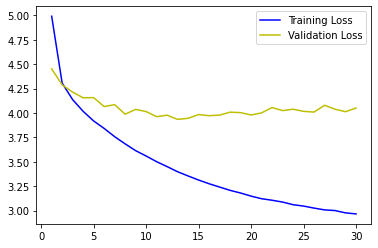

In [ ]:
SRC = Input
TRG = Output
import matplotlib.pyplot as plt

print(train_rec)

	 

epoch = list(range(1, 31))

plt.plot(epoch, train_rec, 'b-', label='Training Loss')
plt.plot(epoch, valid_rec, 'y-', label='Validation Loss')
plt.legend(loc='best')
plt.show()


In [ ]:
SRC = Input
TRG = Output
model.load_state_dict(torch.load('/content/drive/MyDrive/FYP/Model/conala.pt'))

<All keys matched successfully>

In [ ]:
def translate_sentence(sentence, src_field, trg_field, model, device, max_len = 50000):
    
    model.eval()
        
    if isinstance(sentence, str):
        nlp = spacy.load('en')
        tokens = [token.text.lower() for token in nlp(sentence)]
    else:
        tokens = [token.lower() for token in sentence]

    tokens = [src_field.init_token] + tokens + [src_field.eos_token]
        
    src_indexes = [src_field.vocab.stoi[token] for token in tokens]

    src_tensor = torch.LongTensor(src_indexes).unsqueeze(0).to(device)
    
    src_mask = model.make_src_mask(src_tensor)
    
    with torch.no_grad():
        enc_src = model.encoder(src_tensor, src_mask)

    trg_indexes = [trg_field.vocab.stoi[trg_field.init_token]]

    for i in range(max_len):

        trg_tensor = torch.LongTensor(trg_indexes).unsqueeze(0).to(device)

        trg_mask = model.make_trg_mask(trg_tensor)
        
        with torch.no_grad():
            output, attention = model.decoder(trg_tensor, enc_src, trg_mask, src_mask)
        
        pred_token = output.argmax(2)[:,-1].item()
        
        trg_indexes.append(pred_token)

        if pred_token == trg_field.vocab.stoi[trg_field.eos_token]:
            break
    
    trg_tokens = [trg_field.vocab.itos[i] for i in trg_indexes]
    
    return trg_tokens[1:], attention

## Displaying Attention

In [ ]:
def display_attention(sentence, translation, attention, n_heads = 8, n_rows = 4, n_cols = 2):
    
    assert n_rows * n_cols == n_heads
    
    fig = plt.figure(figsize=(30,50))
    
    for i in range(n_heads):
        
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        
        _attention = attention.squeeze(0)[i].cpu().detach().numpy()

        cax = ax.matshow(_attention, cmap='bone')

        ax.tick_params(labelsize=12)
        ax.set_xticklabels(['']+['<sos>']+[t.lower() for t in sentence]+['<eos>'], 
                           rotation=45)
        ax.set_yticklabels(['']+translation)

        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

In [ ]:
src = "write a function that adds two numbers"
src=src.split(" ")
translation, attention = translate_sentence(src, SRC, TRG, model, device)

print(f'predicted trg sequence: ')
print(translation)
print("code: \n", untokenize(translation[:-1]).decode('utf-8'))

predicted trg sequence: 
[(57, 'utf-8'), (1, 'print'), (53, '('), (3, "''"), (53, '.'), (1, 'join'), (53, '('), (1, 'str'), (53, '('), (1, 'var_1'), (53, ')'), (53, ')'), (53, ')'), (4, ''), (0, ''), '<eos>']
code: 
 print (''.join (str (var_1 )))


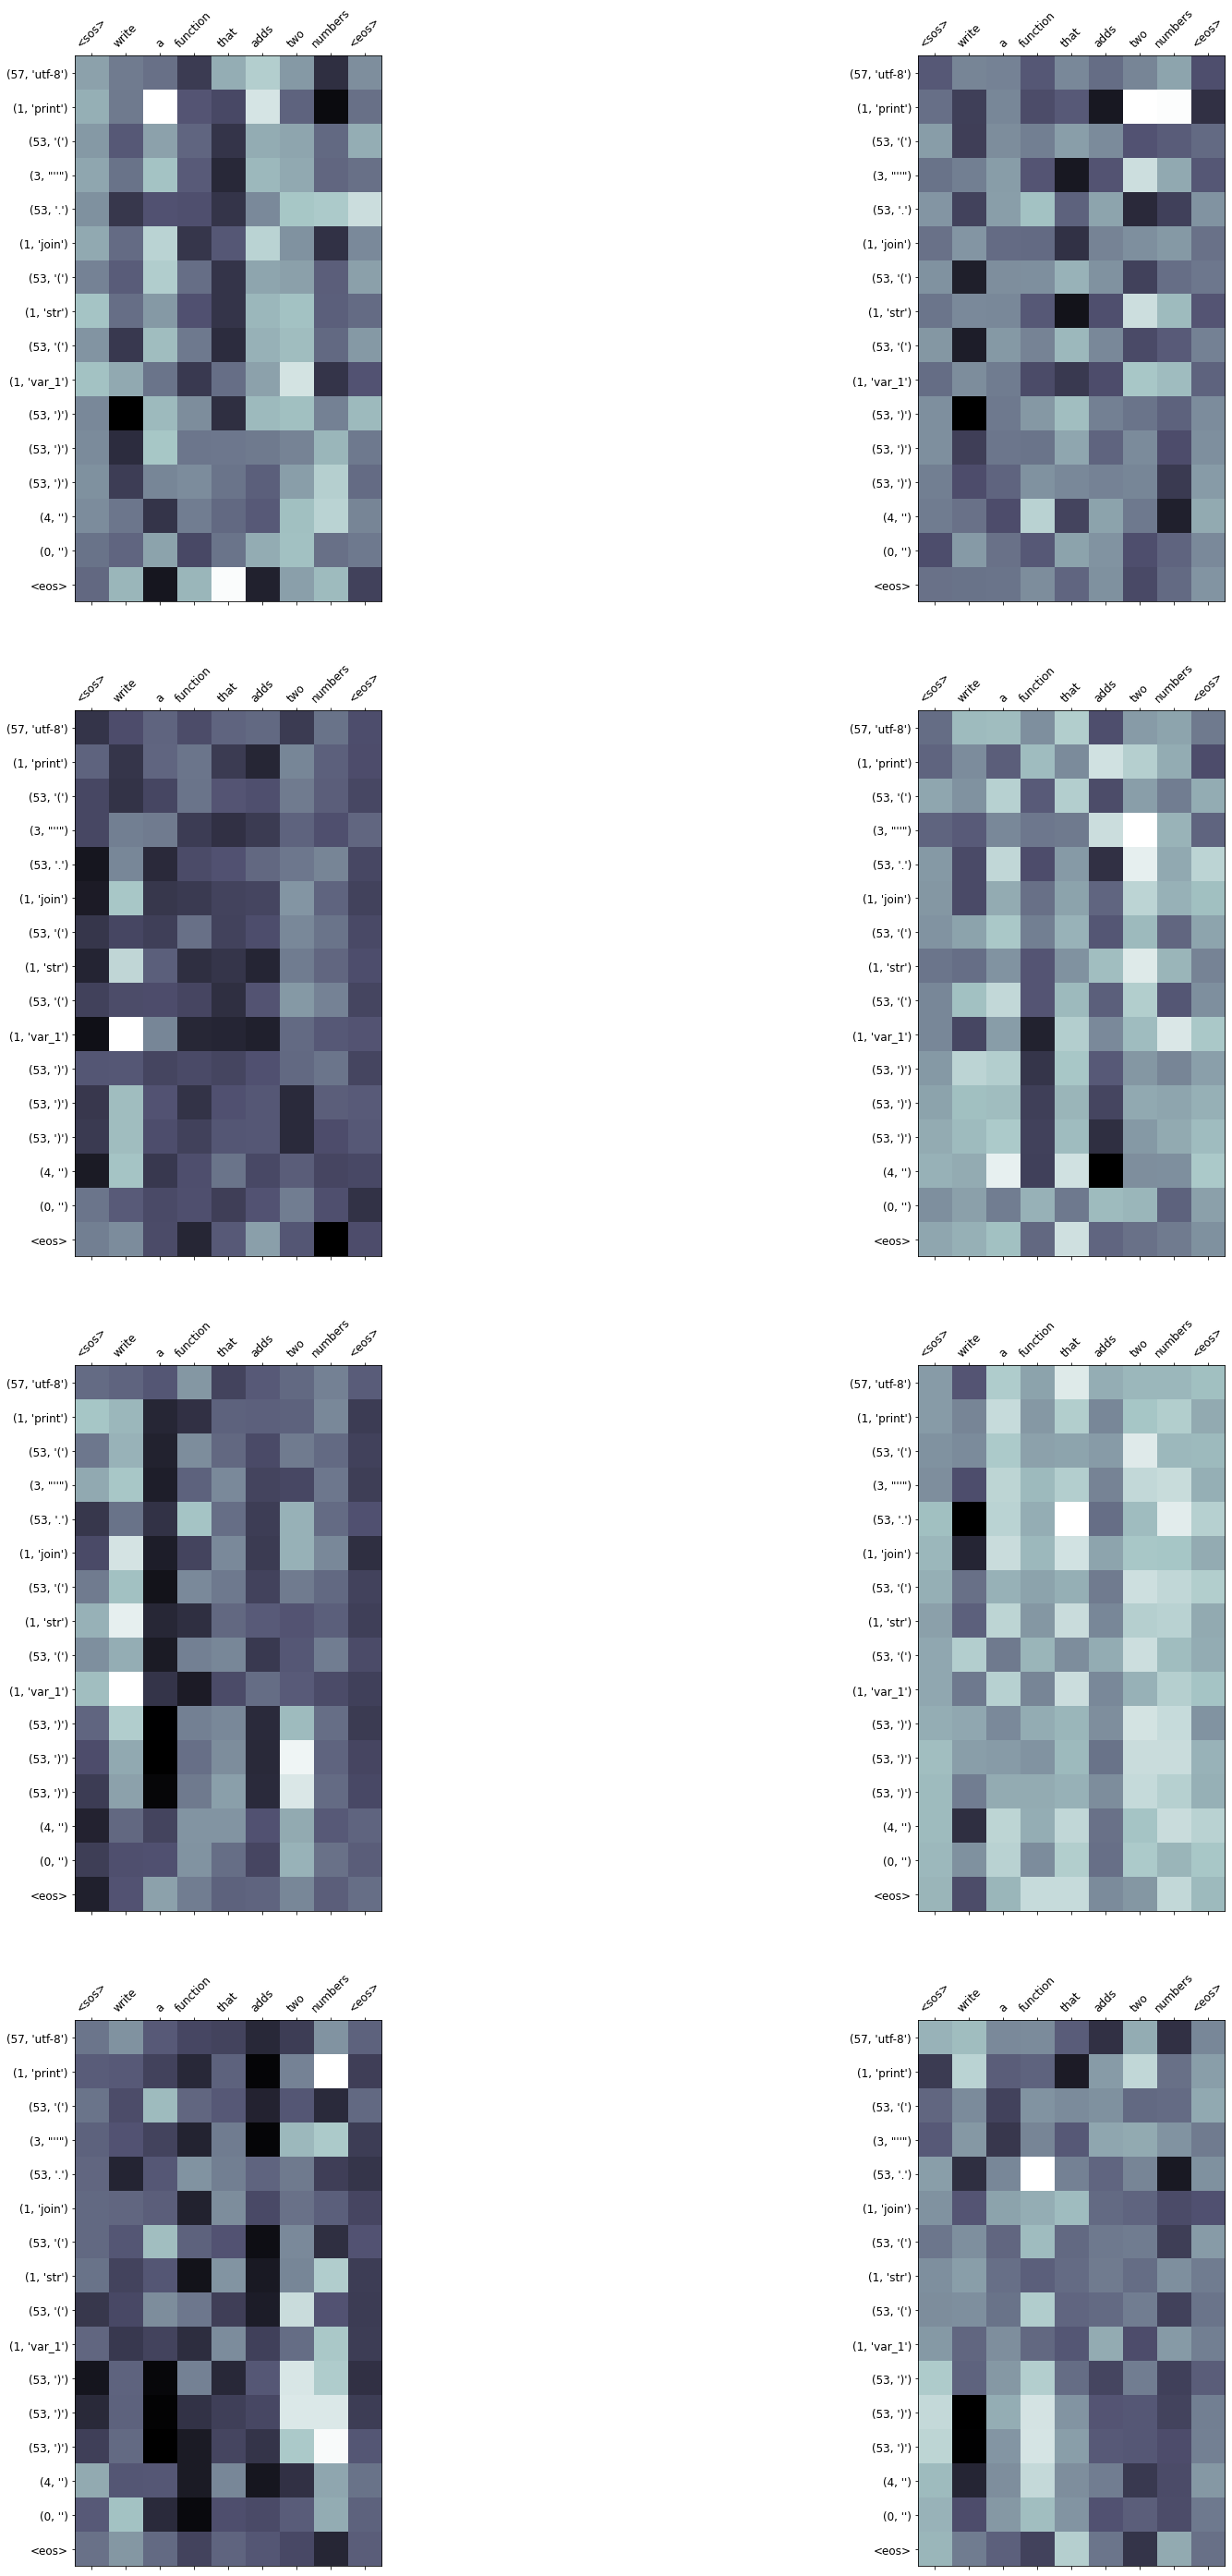

In [ ]:
display_attention(src, translation, attention)


# Sample Outputs for English to Python translation.

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/FYP/Model/conala.pt'))

<All keys matched successfully>

In [ ]:
def eng_to_python(src):
  src=src.split(" ")
  translation, attention = translate_sentence(src, SRC, TRG, model, device)

  #print(f'predicted trg: \n')
  # print(translation)
  #print(untokenize(translation[:-1]).decode('utf-8'))
  return(untokenize(translation[:-1]).decode('utf-8'))


In [ ]:
SRC = Input
TRG = Output

## Example 1

In [ ]:
src = "program to sort a list of dictionaries by key"

print(eng_to_python(src))

sorted (list (var_1 .items ()),key =lambda var_2 :var_2 [1 ])


## Example 2

In [ ]:
dataSet = pd.read_csv('/content/drive/MyDrive/FYP/Datasets/conala-test.csv')
dps = []
ques = dataSet['rewritten_intent']
sol = dataSet['snippet']
backup = dataSet['intent']
print(ques[4])

print(len(ques), len(sol))

for i in range(len(ques)):
  if pd.isnull(ques[i]):
      dp = {"question": backup[i], "solution": sol[i]}
      print("found")
      dps.append(dp)
  else:  
    dp = {"question": ques[i], "solution": sol[i]}
    dps.append(dp)

print(dps[100])
print(len(dps))

nan
500 500
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
{'question': 'remove all non-alphanumeric characters except space from a string `text` and lower it', 'solution': "re.sub('(?!\\\\s)[\\\\W_]', '', text).lower().strip()"}
500


In [ ]:
ans = []
n = 0
for dp in dps:
  try:
    src = dp['question']
    response = eng_to_python(src)
    ans.append(response)
    n= n+1
    print(n)
  except:
    n= n+1
    print('except', n)
    ans.append('')


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
import csv

csv_file = []
f = ["snippet"]
for  dp in ans:
  text = {'snippet':dp}
  #print(text)
  csv_file.append(text)

with open('/content/drive/MyDrive/FYP/Datasets/conala_answer_4.csv','w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames = f)
        writer.writeheader()
        
        writer.writerows(csv_file)
